# Estudiante: Erikson Neira
 - Ejecutado desde un entorno local

In [44]:
!python -m spacy download es_core_news_sm
!pip install pyLDAvis -q

C:\Users\NEIRA\anaconda3\python.exe: No module named spacy


In [45]:
import pandas as pd
df = pd.read_csv("../data/resumenes_short.csv",delimiter='\t')
len(df)

539

In [46]:
!pip install gensim -q

In [47]:
texts = list(df['text'].values)

In [48]:
%matplotlib inline
import nltk
import re
import numpy as np
import pandas as  pd
from pprint import pprint# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import spacy# Plotting tools
import pyLDAvis
import matplotlib.pyplot as plt

In [49]:
nltk.download('stopwords')
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('spanish')
stop_words[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NEIRA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [50]:
# Convert to list
data = df.text.values.tolist()
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

<>:4: DeprecationWarning: invalid escape sequence '\S'
<>:6: DeprecationWarning: invalid escape sequence '\s'
<>:4: DeprecationWarning: invalid escape sequence '\S'
<>:6: DeprecationWarning: invalid escape sequence '\s'
C:\Users\NEIRA\AppData\Local\Temp\ipykernel_10920\3916954315.py:4: DeprecationWarning: invalid escape sequence '\S'
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
C:\Users\NEIRA\AppData\Local\Temp\ipykernel_10920\3916954315.py:6: DeprecationWarning: invalid escape sequence '\s'
  data = [re.sub('\s+', ' ', sent) for sent in data]


In [51]:
data[:1]

['Ficha Resumen - Informe de Control Posterior I. Información general de informes de control posterior: N° de informe: 001-2021-2-0066 Título del informe: Venta directa de bienes inmuebles en la Municipalidad Distrital de José Luis Bustamante y Rivero Objetivo general: Establecer si la venta directa de los terrenos de propiedad de la Municipalidad Distrital de José Luis Bustamante y Rivero ubicados en la urbanización San Basilio, se ejecutó conforme la normativa aplicable. Periodo: 1 de agosto de 2010 al 31 de diciembre de 2014 Entidad sujeta a control: MUNICIPALIDAD DISTRITAL DE JOSÉ LUIS BUSTAMANTE Y RIVERO Monto objeto del servicio (de corresponder):S/ 282,404.50 Ubigeo: Región: AREQUIPAProvincia: AREQUIPADistrito: JOSE LUIS BUSTAMANTE Y RIVERO Fecha de emisión del informe:08/04/2021 Unidad orgánica que emite el informe:OCI - MUNICIPALIDAD DISTRITAL DE JOSÉ LUIS BUSTAMANTE Y RIVERO II. Tipo de servicio de control posterior: Item Tipo de control: (marcar con "X") 1 Auditoría de Cumpl

In [52]:
def sent_to_words(sentences):
  for sentence in sentences:
    yield gensim.utils.simple_preprocess(str(sentence), deacc=True)  #deacc=True removes punctuations
data_words = list(sent_to_words(data))
print(data_words[:1])

[['ficha', 'resumen', 'informe', 'de', 'control', 'posterior', 'informacion', 'general', 'de', 'informes', 'de', 'control', 'posterior', 'de', 'informe', 'titulo', 'del', 'informe', 'venta', 'directa', 'de', 'bienes', 'inmuebles', 'en', 'la', 'municipalidad', 'distrital', 'de', 'jose', 'luis', 'bustamante', 'rivero', 'objetivo', 'general', 'establecer', 'si', 'la', 'venta', 'directa', 'de', 'los', 'terrenos', 'de', 'propiedad', 'de', 'la', 'municipalidad', 'distrital', 'de', 'jose', 'luis', 'bustamante', 'rivero', 'ubicados', 'en', 'la', 'urbanizacion', 'san', 'basilio', 'se', 'ejecuto', 'conforme', 'la', 'normativa', 'aplicable', 'periodo', 'de', 'agosto', 'de', 'al', 'de', 'diciembre', 'de', 'entidad', 'sujeta', 'control', 'municipalidad', 'distrital', 'de', 'jose', 'luis', 'bustamante', 'rivero', 'monto', 'objeto', 'del', 'servicio', 'de', 'corresponder', 'ubigeo', 'region', 'jose', 'luis', 'bustamante', 'rivero', 'fecha', 'de', 'emision', 'del', 'informe', 'unidad', 'organica', 'qu

In [53]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['ficha', 'resumen', 'informe', 'de', 'control', 'posterior', 'informacion', 'general', 'de', 'informes', 'de', 'control', 'posterior', 'de', 'informe', 'titulo', 'del', 'informe', 'venta', 'directa', 'de', 'bienes', 'inmuebles', 'en', 'la', 'municipalidad', 'distrital', 'de', 'jose_luis_bustamante', 'rivero', 'objetivo', 'general', 'establecer', 'si', 'la', 'venta', 'directa', 'de', 'los', 'terrenos', 'de', 'propiedad', 'de', 'la', 'municipalidad', 'distrital', 'de', 'jose_luis_bustamante', 'rivero', 'ubicados', 'en', 'la', 'urbanizacion', 'san', 'basilio', 'se', 'ejecuto', 'conforme', 'la', 'normativa', 'aplicable', 'periodo', 'de', 'agosto', 'de', 'al', 'de', 'diciembre', 'de', 'entidad', 'sujeta', 'control', 'municipalidad', 'distrital', 'de', 'jose_luis_bustamante', 'rivero', 'monto', 'objeto', 'del', 'servicio', 'de', 'corresponder', 'ubigeo', 'region', 'jose_luis_bustamante', 'rivero', 'fecha', 'de', 'emision', 'del', 'informe', 'unidad', 'organica', 'que', 'emite', 'el', 'infor

In [54]:
# Define function for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [57]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('es_core_news_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['ficha', 'resumen', 'informe', 'control', 'posterior', 'general', 'informe', 'control', 'posterior', 'informe', 'titulo', 'informe', 'venta', 'directo', 'bien', 'inmuebl', 'municipalidad', 'distrital', 'jo él', 'luis_bustamante', 'rivero', 'objetivo', 'general', 'establecer', 'ventar', 'directo', 'terreno', 'propiedad', 'municipalidad', 'distrital', 'jo él', 'luis_bustamante', 'rivero', 'ubicado', 'basilio', 'ejecuto', 'normativa', 'aplicable', 'periodo', 'agosto', 'diciembre', 'entidad', 'sujeto', 'control', 'municipalidad', 'distrital', 'jo él', 'luis_bustamante', 'rivero', 'corresponder', 'jo él', 'luis_bustamante', 'rivero', 'fecho', 'informe', 'unidad', 'organico', 'emitir', 'informe', 'municipalidad', 'distrital', 'jo él', 'luis_bustamante', 'rivero', 'control', 'posterior', 'tipo', 'control', 'marcar', 'auditoria', 'cumplimiento', 'auditoria', 'financiero', 'auditorio', 'desempeno', 'servicio', 'control', 'especifico', 'hecho', 'presunto', 'irregularidad', 'accion', 'oficio', 

In [58]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 2), (15, 2), (16, 2), (17, 9), (18, 3), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 2), (30, 6), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 4), (37, 3), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 4), (45, 2), (46, 4), (47, 1), (48, 1), (49, 7), (50, 1), (51, 2), (52, 3), (53, 2), (54, 1), (55, 2), (56, 7), (57, 1), (58, 7), (59, 1), (60, 1), (61, 2), (62, 2), (63, 1), (64, 6), (65, 1), (66, 1), (67, 1), (68, 2), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 2), (76, 1), (77, 5), (78, 2), (79, 2), (80, 1), (81, 2), (82, 2), (83, 1), (84, 3), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 7), (92, 2), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 2), (101, 2), (102, 1), (103, 1)]]


In [59]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [60]:
# Print the keyword of topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.031*"publicidad" + 0.024*"pamparoma" + 0.023*"electoral" + '
  '0.017*"florencio" + 0.014*"publicidad_estatal" + 0.009*"candidato" + '
  '0.007*"oncoy" + 0.006*"provincial" + 0.005*"girado" + 0.004*"elisr"'),
 (1,
  '0.074*"bién" + 0.049*"menor" + 0.046*"compra" + 0.044*"proveedor" + '
  '0.043*"uit" + 0.039*"mantenimiento" + 0.036*"logistico" + 0.033*"precio" + '
  '0.023*"cotización" + 0.020*"bien"'),
 (2,
  '0.058*"control" + 0.042*"informe" + 0.029*"posterior" + 0.026*"hecho" + '
  '0.023*"municipalidad" + 0.020*"distrital" + 0.019*"servicio" + '
  '0.019*"especifico" + 0.017*"entidad" + 0.016*"general"'),
 (3,
  '0.078*"obra" + 0.028*"tecnico" + 0.023*"expediente" + 0.013*"partida" + '
  '0.013*"mejoramiento" + 0.012*"informe" + 0.012*"entidad" + 0.011*"publica" '
  '+ 0.010*"plazo" + 0.009*"contratista"'),
 (4,
  '0.000*"informe" + 0.000*"posterior" + 0.000*"control" + 0.000*"pensionario" '
  '+ 0.000*"bardal" + 0.000*"cuarta" + 0.000*"tulio" + 0.000*"prosegur" + '
  '0

In [61]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.351084932031709

Coherence Score:  0.3729062660224443


In [62]:
import importlib
importlib.reload(pyLDAvis)

<module 'pyLDAvis' from 'C:\\Users\\NEIRA\\.conda\\envs\\unap\\lib\\site-packages\\pyLDAvis\\__init__.py'>

In [63]:
import pyLDAvis
pyLDAvis.enable_notebook()

In [64]:
import pyLDAvis.gensim_models as gensimvis
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

TypeError: Object of type complex is not JSON serializable

PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
6     -0.327770+0.000000j -0.109503+0.000000j       1        1  53.356801
2     -0.412027+0.000000j -0.130345+0.000000j       2        1  21.178136
14    -0.365511+0.000000j -0.193913+0.000000j       3        1  12.860678
3     -0.286977+0.000000j  0.162921+0.000000j       4        1   5.394983
5     -0.306774+0.000000j  0.209078+0.000000j       5        1   4.945196
11    -0.136209+0.000000j  0.216311+0.000000j       6        1   1.466707
1      0.105941+0.000000j -0.023478+0.000000j       7        1   0.583814
0      0.142954+0.000000j -0.014522+0.000000j       8        1   0.064360
16     0.147661+0.000000j -0.016127+0.000000j       9        1   0.064005
18     0.140675+0.000000j -0.012620+0.000000j      10        1   0.052995
19     0.130115+0.000000j -0.008870+0.000000j      11        1   0.005299
10     

In [65]:
def coherence_values_computation(dictionary, corpus, texts, limit, start=2, step=3):
   coherence_values = []
   model_list = []
   from tqdm import tqdm
   for num_topics in tqdm(range(start, limit, step)):
      model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())
   return model_list, coherence_values

100%|██████████| 7/7 [04:31<00:00, 38.79s/it]


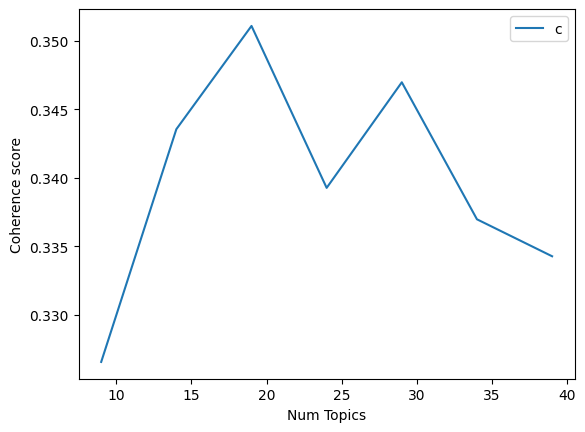

In [66]:
import warnings
warnings.filterwarnings('ignore')
limit=40; start=9; step=5;
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus, texts=data_lemmatized,
   start=start, limit=limit, step=step)

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [67]:
for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 9  is having Coherence Value of 0.3265
Num Topics = 14  is having Coherence Value of 0.3435
Num Topics = 19  is having Coherence Value of 0.3511
Num Topics = 24  is having Coherence Value of 0.3393
Num Topics = 29  is having Coherence Value of 0.347
Num Topics = 34  is having Coherence Value of 0.337
Num Topics = 39  is having Coherence Value of 0.3343


In [68]:
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(4,
  '0.000*"cuarta" + 0.000*"pensionario" + 0.000*"vinculante" + 0.000*"andres" '
  '+ 0.000*"bardal" + 0.000*"tijeral" + 0.000*"cabral" + 0.000*"tulio" + '
  '0.000*"pronuncie" + 0.000*"rectificatorio"'),
 (16,
  '0.000*"cuarta" + 0.000*"pensionario" + 0.000*"vinculante" + 0.000*"andres" '
  '+ 0.000*"bardal" + 0.000*"tijeral" + 0.000*"cabral" + 0.000*"tulio" + '
  '0.000*"pronuncie" + 0.000*"rectificatorio"'),
 (25,
  '0.000*"cuarta" + 0.000*"pensionario" + 0.000*"vinculante" + 0.000*"andres" '
  '+ 0.000*"bardal" + 0.000*"tijeral" + 0.000*"cabral" + 0.000*"tulio" + '
  '0.000*"pronuncie" + 0.000*"rectificatorio"'),
 (6,
  '0.000*"cuarta" + 0.000*"pensionario" + 0.000*"vinculante" + 0.000*"andres" '
  '+ 0.000*"bardal" + 0.000*"tijeral" + 0.000*"cabral" + 0.000*"tulio" + '
  '0.000*"pronuncie" + 0.000*"rectificatorio"'),
 (17,
  '0.000*"cuarta" + 0.000*"pensionario" + 0.000*"vinculante" + 0.000*"andres" '
  '+ 0.000*"bardal" + 0.000*"tijeral" + 0.000*"cabral" + 0.000*"tulio" + '
 

In [73]:
def dominant_topics(ldamodel=lda_model, corpus=corpus, texts=data):
   sent_topics_df = pd.DataFrame(columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])
   for i, row in enumerate(ldamodel[corpus]):
      row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
      for j, (topic_num, prop_topic) in enumerate(row):
         if j == 0: # => dominant topic
            wp = ldamodel.show_topic(topic_num)
            topic_keywords = ", ".join([word for word, prop in wp])
            sent_topics_df.loc[i] = [int(topic_num), round(prop_topic, 4), topic_keywords]
            break
   contents = pd.Series(texts)
   sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
   return sent_topics_df

In [74]:
df_topic_sents_keywords = dominant_topics(
   ldamodel=optimal_model, corpus=corpus, texts=data
)

<Axes: >

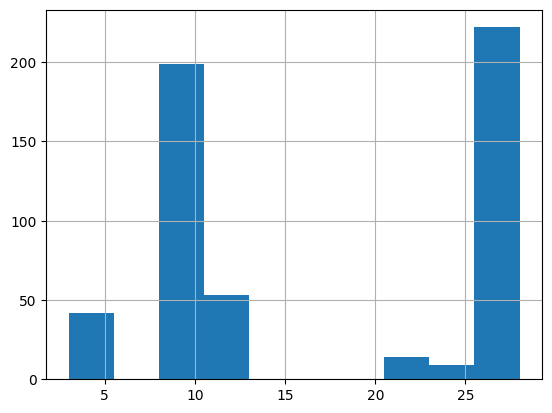

In [75]:
df_topic_sents_keywords['Dominant_Topic'].hist()

In [76]:
sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')
for i, grp in sent_topics_outdf_grpd:
   sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], axis=0)
sent_topics_sorteddf.reset_index(drop=True, inplace=True)
sent_topics_sorteddf.columns = [
   'Topic_Number', "Contribution_Perc", "Keywords", "Text"
]
sent_topics_sorteddf.head()

,Topic_Number,Contribution_Perc,Keywords,Text
0,3,0.5420,"servicio, disponer, control, municipal, subger...",Ficha Resumen - Informe de Control Posterior I...
1,9,0.9936,"control, informe, posterior, municipalidad, he...",Ficha Resumen - Informe de Control Posterior I...
2,11,0.5881,"obra, tecnico, expediente, contrato, proyecto,...",Ficha Resumen - Informes de Control Posterior ...
3,12,0.9860,"control, informe, obra, hecho, posterior, enti...",Ficha Resumen - Informe de Control Posterior I...
4,21,0.6391,"control, entidad, informe, municipalidad, dist...",Ficha Resumen - Informe de Control Posterior I...


In [77]:
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates().set_index('Dominant_Topic')['Topic_Keywords']
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1).reset_index()
df_dominant_topics.columns = [
   'Dominant-Topic', 'Topic-Keywords', 'Num_Documents', 'Perc_Documents'
]
df_dominant_topics

,Dominant-Topic,Topic-Keywords,Num_Documents,Perc_Documents
0,9,"control, informe, posterior, municipalidad, he...",199,0.3692
1,12,"control, informe, obra, hecho, posterior, enti...",35,0.0649
2,28,"informe, funcionario, control, disponer, entid...",222,0.4119
3,21,"control, entidad, informe, municipalidad, dist...",14,0.0260
4,3,"servicio, disponer, control, municipal, subger...",42,0.0779
5,23,"obra, publica, informe, tecnico, construccion,...",9,0.0167
6,11,"obra, tecnico, expediente, contrato, proyecto,...",18,0.0334


In [86]:
vis = gensimvis.prepare(optimal_model, corpus, id2word)

In [87]:
vis

TypeError: Object of type complex is not JSON serializable

PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
9     -0.408211+0.000000j  0.104057+0.000000j       1        1  31.886162
28    -0.401412+0.000000j  0.094543+0.000000j       2        1  30.585022
3     -0.344209+0.000000j  0.097144+0.000000j       3        1  10.815185
11    -0.338085+0.000000j -0.191430+0.000000j       4        1   8.654846
21    -0.343082+0.000000j  0.125247+0.000000j       5        1   7.032661
12    -0.410787+0.000000j -0.035168+0.000000j       6        1   6.527101
23    -0.298653+0.000000j -0.235260+0.000000j       7        1   3.207123
14     0.085039+0.000000j -0.077382+0.000000j       8        1   0.374919
5      0.122131+0.000000j  0.014490+0.000000j       9        1   0.259702
15     0.114327+0.000000j  0.008877+0.000000j      10        1   0.256646
19     0.122272+0.000000j  0.004280+0.000000j      11        1   0.152197
24     

# Distribución de tópicos de documentos
Usamos el método get_document_topics que realiza la inferencia de la distribución de topicos de un documento. Devuelve una lista de tupas (topic_id, probability)

In [85]:
# Get document topics
all_topics = optimal_model.get_document_topics(corpus, minimum_probability=0)
all_topics[0]

[(0, 4.0145787e-05),
 (1, 4.103315e-05),
 (2, 4.29945e-05),
 (3, 0.00089679135),
 (4, 3.8361402e-05),
 (5, 0.005328634),
 (6, 3.944864e-05),
 (7, 4.0885378e-05),
 (8, 3.933354e-05),
 (9, 0.7959901),
 (10, 4.0251412e-05),
 (11, 0.0006297868),
 (12, 0.00045685665),
 (13, 4.0817224e-05),
 (14, 0.16123353),
 (15, 7.786244e-05),
 (16, 3.892135e-05),
 (17, 3.924803e-05),
 (18, 4.3393906e-05),
 (19, 8.342089e-05),
 (20, 4.1281513e-05),
 (21, 0.015443392),
 (22, 4.3080836e-05),
 (23, 0.0003589753),
 (24, 0.00010794053),
 (25, 3.9448973e-05),
 (26, 4.186826e-05),
 (27, 4.933318e-05),
 (28, 0.018692803)]

In [80]:
vectors = np.array([ [topics[1] for topics in doc_topics] for doc_topics in all_topics])

In [81]:
top2words = {i:optimal_model.print_topic(i) for i in range(optimal_model.num_topics)}

In [82]:
df['dominant_topic'] = np.argmax(vectors,axis=1)
df['dominant_words'] = df['dominant_topic'].apply(lambda x: top2words[x])
df['metadata'] = df.apply(lambda row:f'{row.tipo}\t{row.departamento}\t{row.title}\t{row.objetivo}\t{row.dominant_topic}\t{row.dominant_words}', axis=1)

In [83]:
np.savetxt('values.tsv', vectors, delimiter='\t')
import numpy as np
metadata = 'Tipo\tDepartamento\tTitulo\tObjetivo\tDominant_Topic\tDominant_Words\n'+'\n'.join(df['metadata'].tolist())
with open('metadata.tsv','w+') as file:
  file.write(metadata)



*   ACTIVIDAD 1: Qué información importante encontró con el modelo, analice un documento de la controloría
*   ACTIVIDAD 2: Conclusiones del laboratorio


